In [2]:
%matplotlib inline

# Analyze Imaging Mass Cytometry data

This tutorial shows how to apply Squidpy to Imaging Mass Cytometry data.

The data used here comes from a recent paper from `jackson2020single`.
We provide a pre-processed subset of the data, in `anndata.AnnData`
format. For details on how it was pre-processed, please refer to the
original paper.

::: seealso
See `sphx_glr_auto_tutorials_tutorial_seqfish.py` for additional
analysis examples.
:::

## Import packages & data

To run the notebook locally, create a conda environment as *conda env
create -f environment.yml* using this
[environment.yml](https://github.com/scverse/squidpy_notebooks/blob/main/environment.yml).


In [3]:
import squidpy as sq

print(f"squidpy=={sq.__version__}")

# load the pre-processed dataset
adata = sq.datasets.imc()

squidpy==1.2.3


First, let\'s visualize the cluster annotation in spatial context with
`squidpy.pl.spatial_scatter`.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


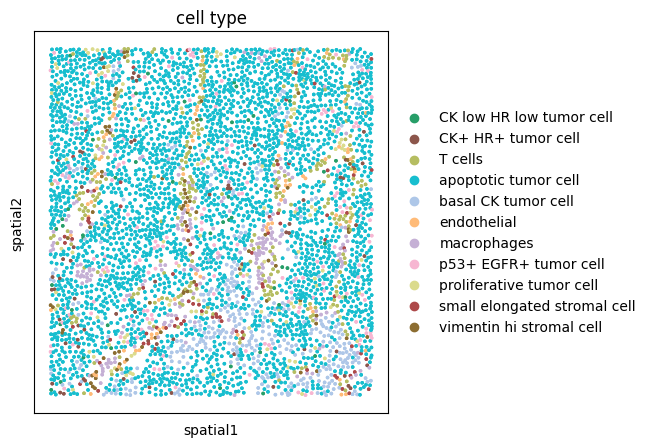

In [4]:
sq.pl.spatial_scatter(adata, shape=None, color="cell type", size=10)

We can appreciate how the majority of the tissue seems to consist of
*apoptotic tumor cells*. There also seem to be other cell types
scattered across the tissue, annotated as *T cells*, *Macrophages* and
different types of *Stromal cells*. We can also appreciate how a subset
of tumor cell, *basal CK tumor cells* seems to be located in the lower
part of the tissue.


# Co-occurrence across spatial dimensions

We can visualize cluster co-occurrence in spatial dimensions using the
original spatial coordinates. The co-occurrence score is defined as:

$$\frac{p(exp|cond)}{p(exp)}$$

where $p(exp|cond)$ is the conditional probability of observing a
cluster $exp$ conditioned on the presence of a cluster $cond$, whereas
$p(exp)$ is the probability of observing $exp$ in the radius size of
interest. The score is computed across increasing radii size around each
cell in the tissue.

We can compute this score with `squidpy.gr.co_occurrence` and set the
cluster annotation for the conditional probability with the argument
`clusters`. Then, we visualize the results with
`squidpy.pl.co_occurrence`. We visualize the result for two conditional
groups, namely *basal CK tumor cell* and *T cells*.


  0%|          | 0/1 [00:00<?, ?/s]

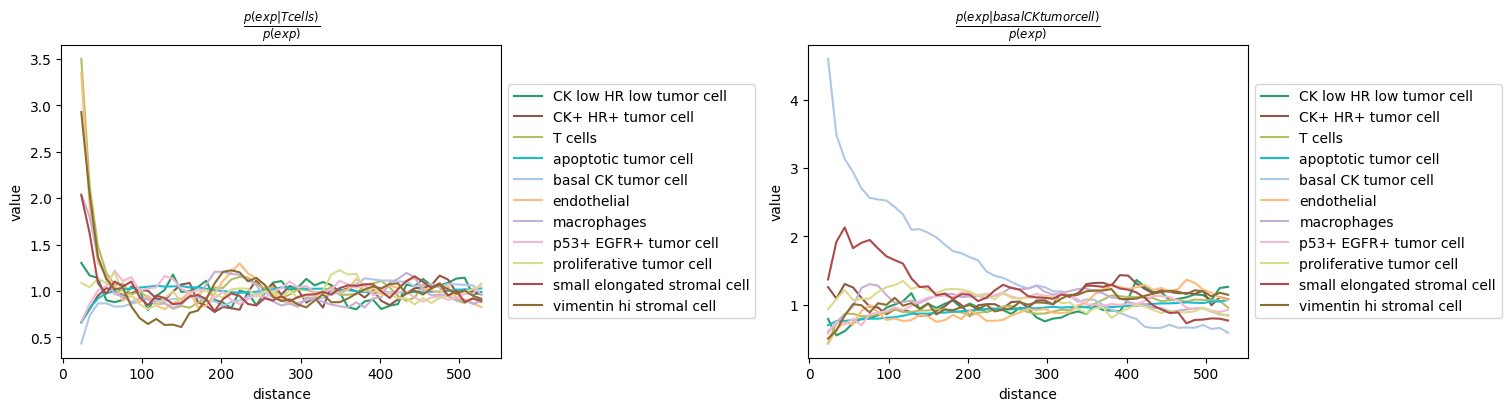

In [6]:
sq.gr.co_occurrence(adata, cluster_key="cell type")
sq.pl.co_occurrence(
    adata,
    cluster_key="cell type",
    clusters=["basal CK tumor cell", "T cells"],
    figsize=(15, 4),
)

We can observe that *T cells* seems to co-occur with *endothelial* and
*vimentin hi stromal cells*, whereas *basal CK tumor cell* seem to
largely cluster together, except for the presence of a type of stromal
cells (*small elongated stromal cell*) at close distance.


> IDF: Let's visualize some of these cell types to inspect their co-ocurrence

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


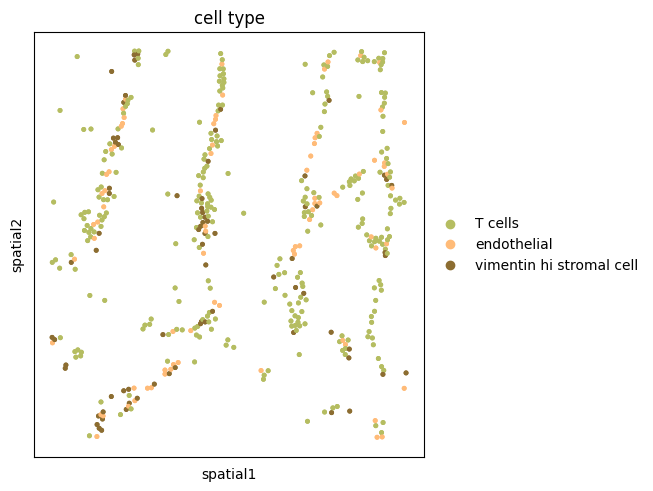

In [19]:
sq.pl.spatial_scatter(adata, color='cell type', groups=["T cells", "endothelial",
"vimentin hi stromal cell"], shape=None)

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


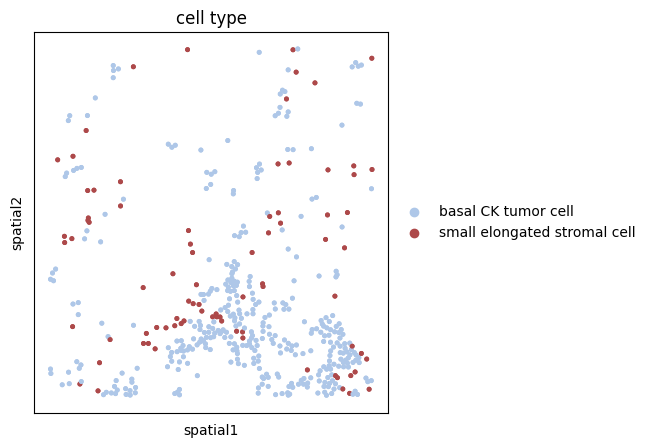

In [22]:
sq.pl.spatial_scatter(adata, 
                      color='cell type', 
                      groups=['basal CK tumor cell', 'small elongated stromal cell'] ,
                      shape=None)

# Neighborhood enrichment

A similar analysis that can inform on the neighbor structure of the
tissue is the *neighborhood enrichment test*. You can compute such score
with the following function: `squidpy.gr.nhood_enrichment`. In short,
it\'s an enrichment score on spatial proximity of clusters: if spots
belonging to two different clusters are often close to each other, then
they will have a high score and can be defined as being *enriched*. On
the other hand, if they are far apart, the score will be low and they
can be defined as *depleted*. This score is based on a permutation-based
test, and you can set the number of permutations with the `n_perms`
argument (default is 1000).

Since the function works on a connectivity matrix, we need to compute
that as well. This can be done with `squidpy.gr.spatial_neighbors`.
Please see `sphx_glr_auto_examples_graph_compute_spatial_neighbors.py`
for more details of how this function works.

Finally, we visualize the results with `squidpy.pl.nhood_enrichment`.


  0%|          | 0/1000 [00:00<?, ?/s]

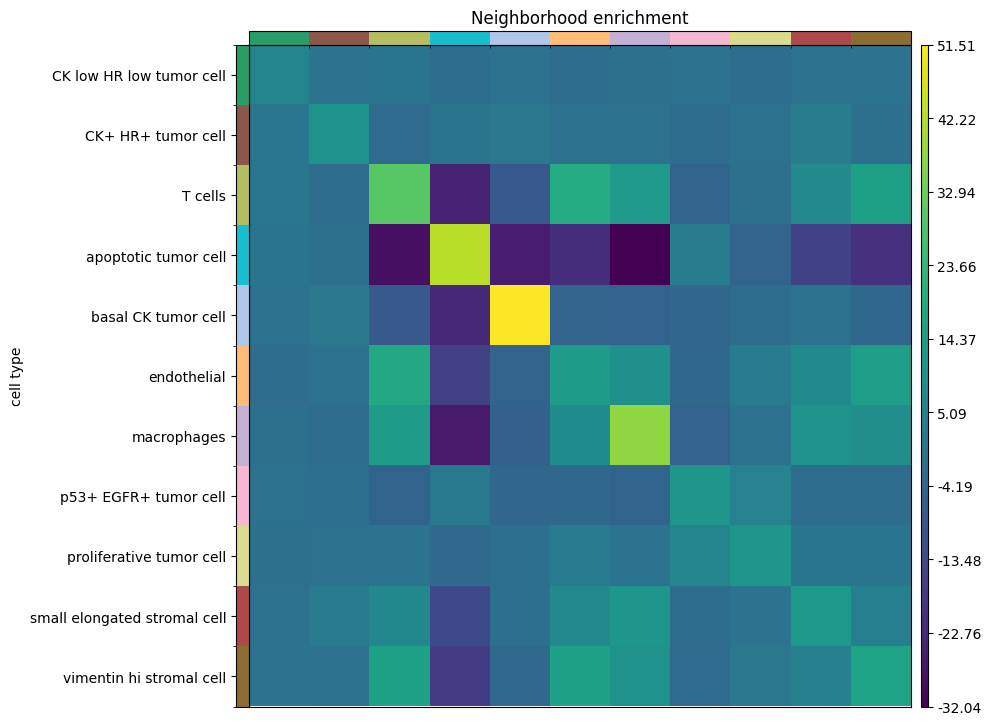

In [7]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="cell type")
sq.pl.nhood_enrichment(adata, cluster_key="cell type")

Interestingly, *T cells* shows an enrichment with *stromal* and
*endothelial cells*, as well as *macrophages*. Another interesting
result is that *apoptotic tumor cells*, being uniformly spread across
the tissue area, show a neighbor depletion against any other cluster
(but a strong enrichment for itself). This is a correct interpretation
from a permutation based approach, because the cluster annotation, being
uniformly spread across the tissue, and in high number, it\'s more
likely to be enriched with cell types from the same class, rather than
different one.


> IDF: Let's visualize the spatial localtion of these sets of cells to inspect their neighbourhood structure

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


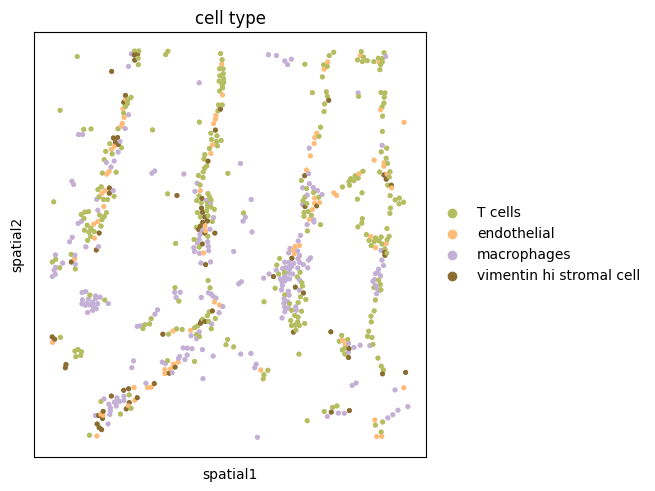

In [25]:
sq.pl.spatial_scatter(adata, 
                      shape=None, 
                      color=['cell type'], 
                      groups=['T cells', 'vimentin hi stromal cell', 'endothelial', 'macrophages'])

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


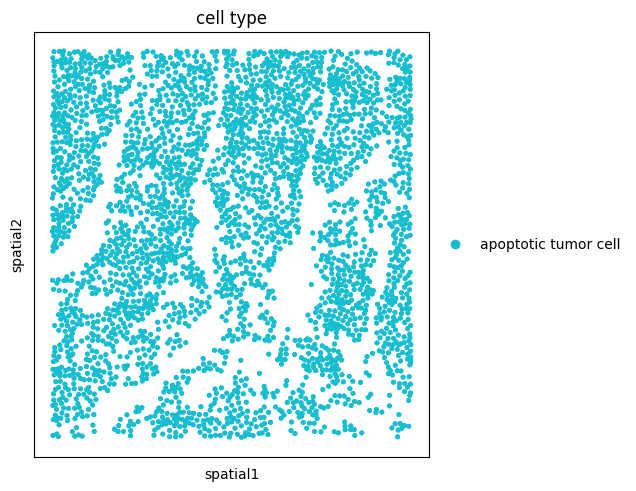

In [29]:
sq.pl.spatial_scatter(adata,
                     shape=None,
                     color='cell type',
                     groups=['apoptotic tumor cell'])

# Interaction matrix and network centralities

Squidpy provides other descriptive statistics of the spatial graph. For
instance, the interaction matrix, which counts the number of edges that
each cluster share with all the others. This score can be computed with
the function `squidpy.gr.interaction_matrix`. We can visualize the
results with `squidpy.pl.interaction_matrix`.


In [45]:
sq.gr.interaction_matrix(adata, cluster_key="cell type")
adata.uns['cell type_interactions']

array([[1.6000e+01, 4.0000e+00, 2.0000e+01, 1.7600e+02, 1.9000e+01,
        0.0000e+00, 9.0000e+00, 8.0000e+00, 2.0000e+00, 4.0000e+00,
        4.0000e+00],
       [6.0000e+00, 4.2000e+01, 1.1000e+01, 2.8000e+02, 4.0000e+01,
        6.0000e+00, 1.7000e+01, 6.0000e+00, 8.0000e+00, 1.6000e+01,
        4.0000e+00],
       [2.1000e+01, 1.3000e+01, 5.1400e+02, 5.7700e+02, 3.8000e+01,
        1.3300e+02, 2.0100e+02, 2.1000e+01, 3.4000e+01, 7.1000e+01,
        1.1000e+02],
       [1.9400e+02, 2.6700e+02, 5.8000e+02, 1.5164e+04, 9.4800e+02,
        1.2000e+02, 3.4300e+02, 6.8600e+02, 3.8000e+02, 1.6800e+02,
        1.0700e+02],
       [2.1000e+01, 4.0000e+01, 4.1000e+01, 9.1700e+02, 1.0440e+03,
        7.0000e+00, 5.4000e+01, 3.9000e+01, 3.6000e+01, 3.5000e+01,
        1.3000e+01],
       [0.0000e+00, 5.0000e+00, 1.3000e+02, 1.2300e+02, 6.0000e+00,
        6.3000e+01, 7.0000e+01, 0.0000e+00, 2.1000e+01, 3.0000e+01,
        5.0000e+01],
       [1.0000e+01, 9.0000e+00, 2.0600e+02, 3.2100e+02, 4.

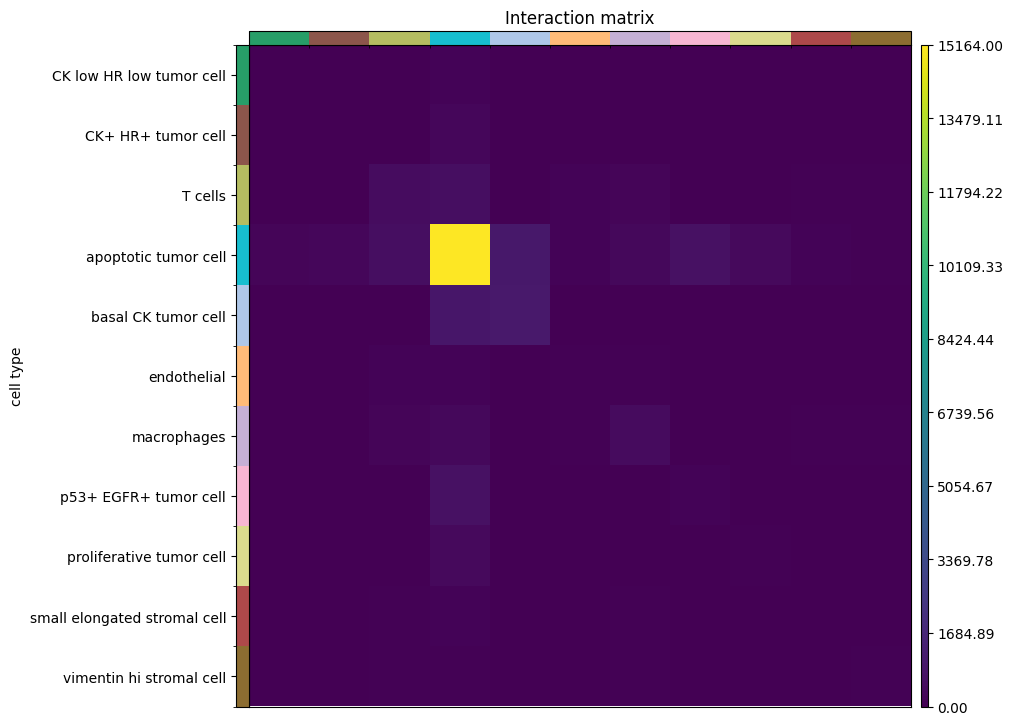

In [34]:
sq.pl.interaction_matrix(adata, cluster_key="cell type")

> IDF: Default=edge counts, but maybe the proportional counts are also interesting (normalized per celly type row)

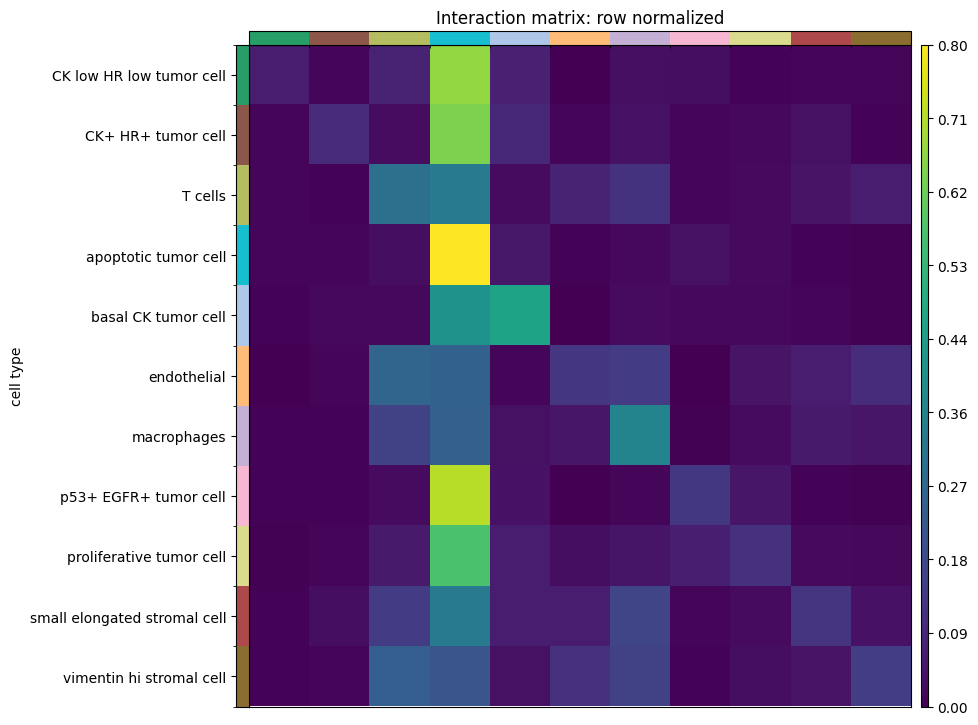

In [36]:
sq.pl.interaction_matrix(adata, cluster_key="cell type", title='Interaction matrix: row normalized')

Finally, similar to the previous analysis, we can investigate properties
of the spatial graph by computing different network centralities:

> -   degree_centrality.
> -   average_clustering.
> -   closeness_centrality.

Squidpy provides a convenient function for all of them:
`squidpy.gr.centrality_scores` and `squidpy.pl.centrality_scores` for
visualization.


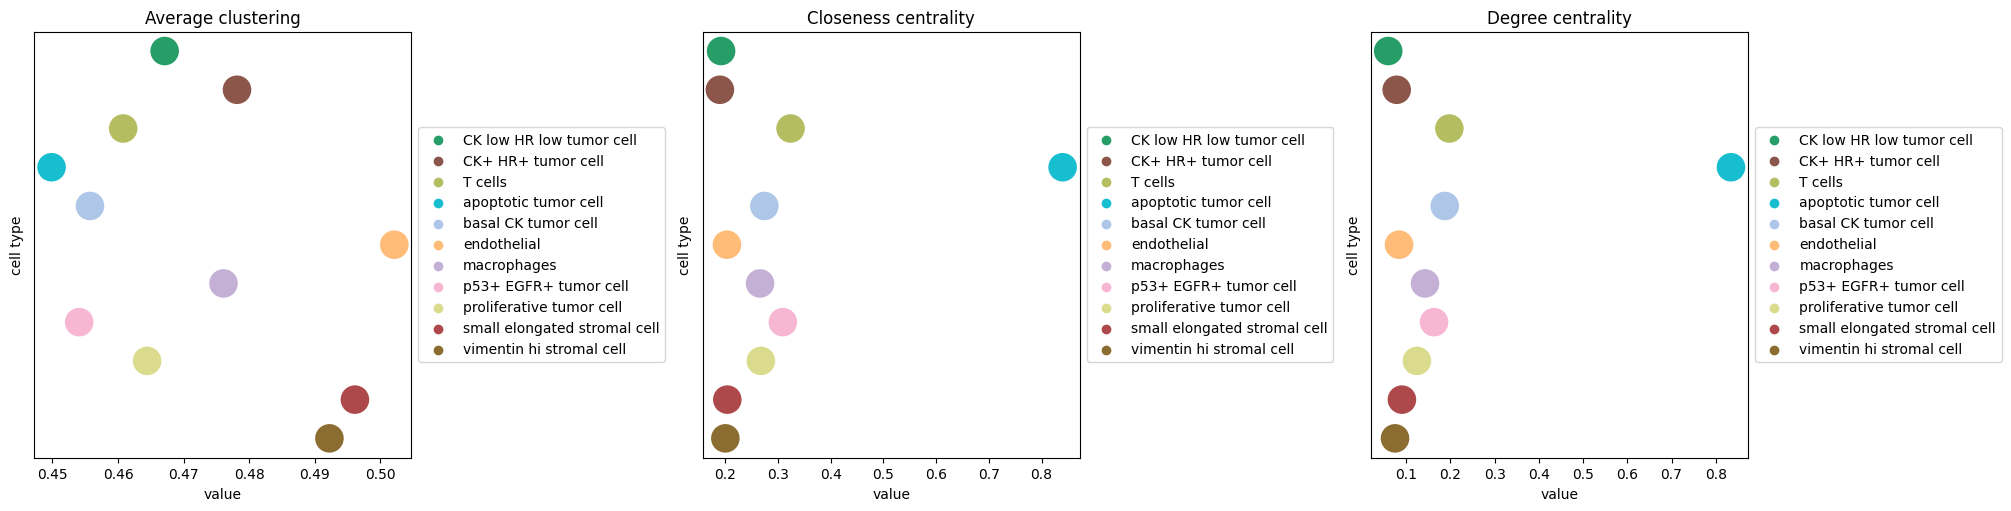

In [46]:
sq.gr.centrality_scores(
    adata,
    cluster_key="cell type",
)
sq.pl.centrality_scores(adata, cluster_key="cell type", figsize=(20, 5), s=500)

You can familiarize yourself with network centralities from the
excellent `networkx`
[documentation](https://networkx.org/documentation/stable/reference/algorithms/centrality)
. For the purpose of this analysis, we can appreciate that the
*apoptotic tumor cell* clusters shows high closeness centrality,
indicating that nodes belonging to that group are often close to each
other in the spatial graph.
